In [6]:
# Imports
from utils import load_image, is_grayscale, show_image, display_wavelet_coefficients, dwt2_gray
from skimage import color
import pywt
import cv2
import numpy as np
from wavelets import dwt2_edge_detection, get_outline

## 1. Define constants

In [7]:
# Define path to images
IMG_PATH = './images/'
IMG_NAME = 'girl.jpeg'

# Define wavelet type and depth of wavelet transformation
WAVELET_MODE = 'haar'
WAVELET_LEVEL = 5

## 2. Load image and convert to grayscale

(2000, 3000, 3)


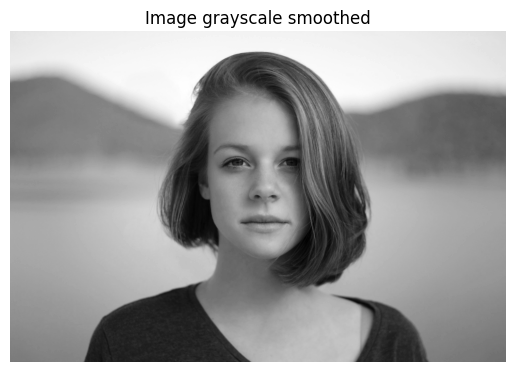

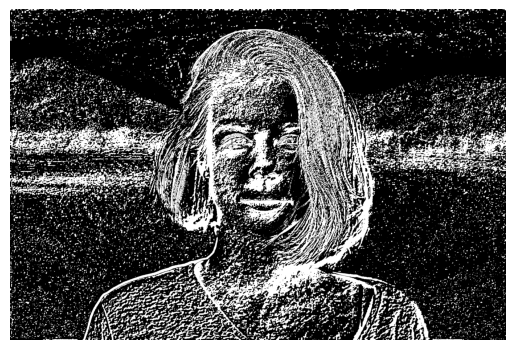

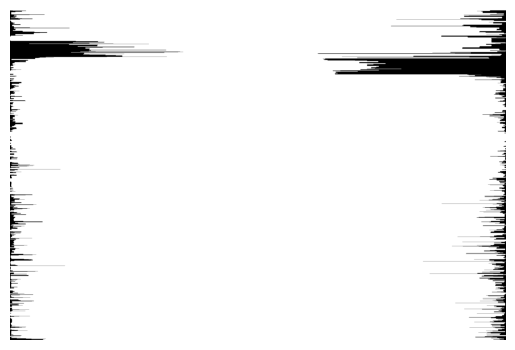

In [12]:
# Read image
image = load_image(IMG_PATH + IMG_NAME)

print(image.shape)

# Get grayscale of image and convert to uint8 which is needed for operations
image_gray = color.rgb2gray(image) if not is_grayscale(image) else image

# Normalize pixel values to (0, 255) if floating point (0-1)
if image_gray.dtype == np.float32 or image_gray.dtype == np.float64:
    image_gray = (image_gray * 255).astype(np.uint8)

# Ensure image is uint8
if image_gray.dtype != np.uint8:
    image_gray = image_gray.astype(np.uint8)

# Smooth image (will be done by other later)
image_gray = cv2.medianBlur(image_gray, 3)

show_image(image_gray, caption='Image grayscale smoothed')

mask = dwt2_edge_detection(image_gray, WAVELET_MODE, 2, 255, 20)
outline = get_outline(mask)

show_image(mask)
show_image(outline)


## 3. Perform wavelet transform

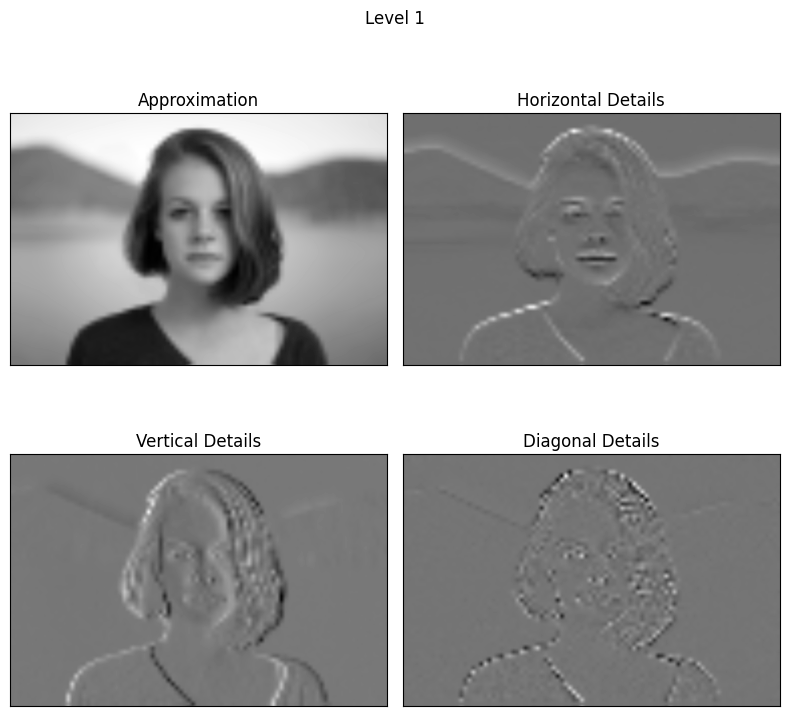

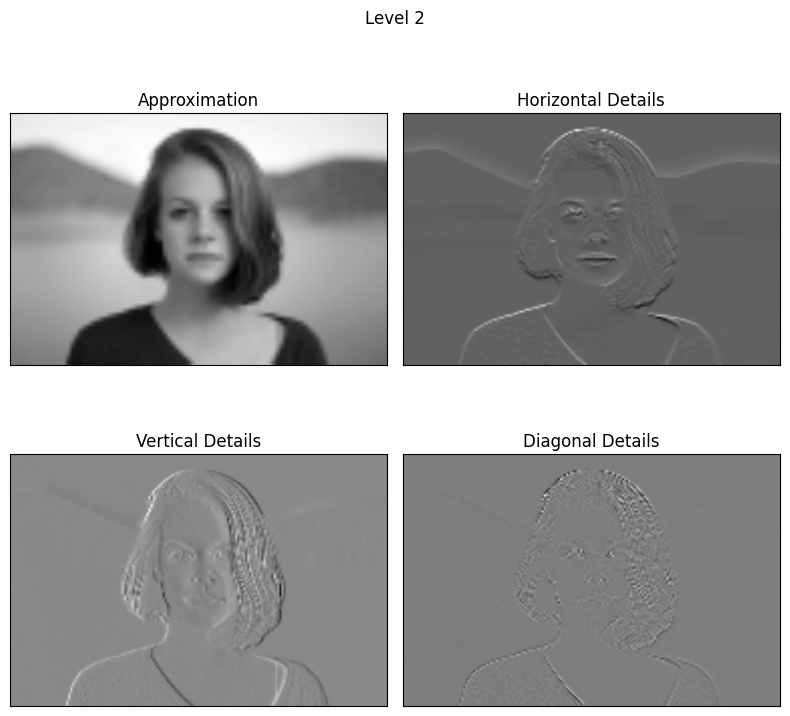

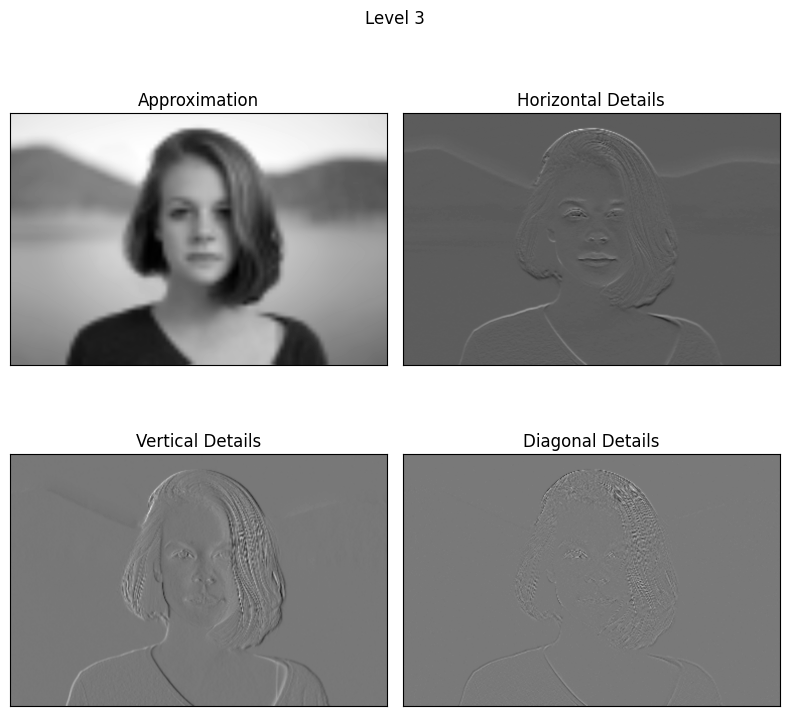

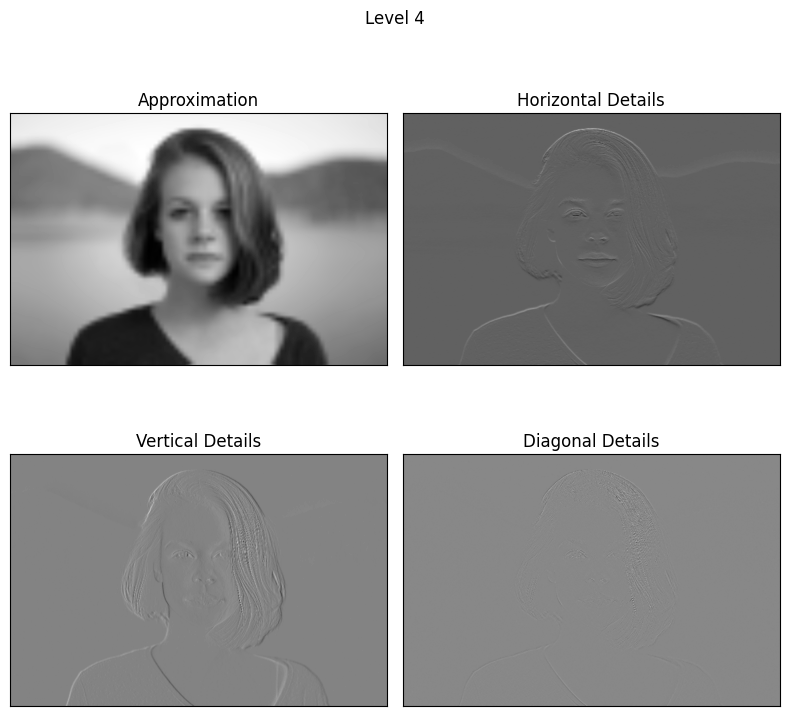

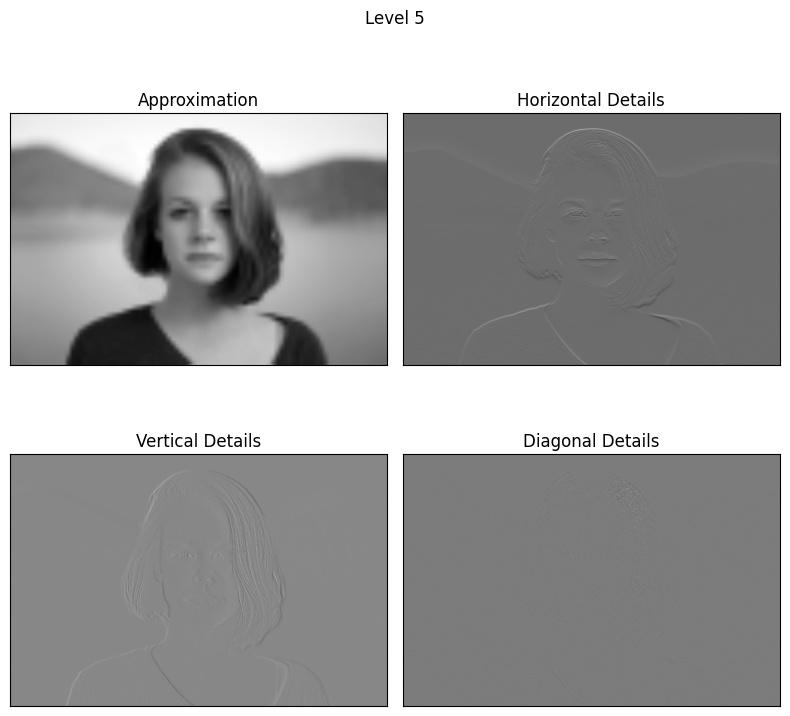

In [9]:
# Perform wavelet transformation to a depth of 'WAVELET_LEVEL'
coeffs = dwt2_gray(image_gray, WAVELET_MODE, WAVELET_LEVEL)

# Get approximation and deepest level of approximation

approximation = coeffs[0]
deepest_details = coeffs[1]
# Display last level of coefficients
for i in range(1, WAVELET_LEVEL+1):
    detail_level = coeffs[i]
    display_wavelet_coefficients(approximation, detail_level, caption=f'Level {i}')

### Comments
Observations of the different wavelet transformation shows that the horizon is strongly present in horizontal details, while the vertical and to some extent diagonal details clearly distinguishes the object more. To create an edge detection mask, less focus should ideally be given to horizontal details if the horizon is not desired, which is the case in our project.

## 4. Get an edge mask from different layers

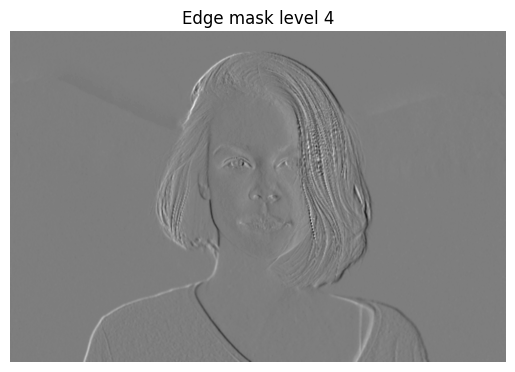

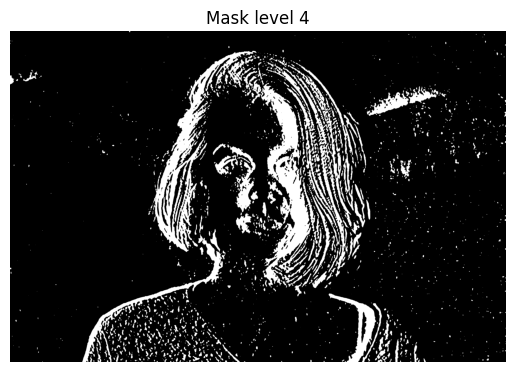

In [10]:
# From observing the wavelet transformations, the fourth (level 2) could be useful for a mask

details_4 = coeffs[4]

# 
edges = (details_4[1] + details_4[2]) 
edges /= np.max(edges)

# Smooth
edges = cv2.GaussianBlur(edges, (15, 15), 0)

threshold_upper = 0.9
threshold_lower = 0.01
mask = 1 - ((edges > threshold_upper) | (edges < threshold_lower))


show_image(edges, caption="Edge mask level 4")
show_image(mask, caption="Mask level 4")
